# EDA Project on MLB

#### In this project, I analyze the average number of home runs per player across MLB teams during the 2023 season. The analysis helps identify which teams fielded the most power hitters on average, visualized through bar charts for clearer comparison.

In [178]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [179]:
df = pd.read_csv('batting_2023_data.csv')
df.head(5)

,Name,Team,G,AB,PA,H,1B,2B,3B,HR,...,CB%,CBv,CH%,CHv,SF%,SFv,Batting,Base Running,Fielding,WAR
0,Zack Short,DET,112,221,253,45,29,9,0,7,...,0.073,79.1,0.071,84.8,0.006,86.8,-7.4,-0.6,-4.1,-0.2
1,Zack Gelof,OAK,69,270,300,72,37,20,1,14,...,0.100,79.8,0.123,85.5,0.018,85.6,11.9,3.3,2.5,2.9
2,Zach Remillard,CHW,54,147,160,37,29,7,0,1,...,0.092,79.8,0.078,84.4,0.010,85.2,-6.2,1.9,0.2,0.2
3,Zach Neto,LAA,84,289,329,65,39,17,0,9,...,0.094,80.9,0.043,86.1,0.026,87.0,-4.5,-0.4,0.8,1.1
4,Zach McKinstry,DET,148,464,518,107,73,21,4,9,...,0.096,80.0,0.130,86.3,0.025,87.3,-11.8,1.7,4.5,1.2


In [180]:
df.tail()

,Name,Team,G,AB,PA,H,1B,2B,3B,HR,...,CB%,CBv,CH%,CHv,SF%,SFv,Batting,Base Running,Fielding,WAR
456,Adley Rutschman,BAL,154,588,687,163,111,31,1,20,...,0.092,80.0,0.156,86.0,0.033,86.7,22.3,-3.0,5.1,5.1
457,Adam Frazier,BAL,141,412,455,99,63,21,2,13,...,0.073,80.0,0.107,86.6,0.030,86.0,-3.8,2.1,-12.0,0.3
458,Adam Duvall,BOS,92,320,353,79,32,24,2,21,...,0.096,80.4,0.076,85.0,0.025,85.1,6.6,3.0,-2.2,1.9
459,Aaron Judge,NYY,106,367,458,98,45,16,0,37,...,0.088,80.6,0.117,86.1,0.043,86.9,40.9,1.0,2.1,5.3
460,Aaron Hicks,BAL,93,269,312,68,50,9,1,8,...,0.132,80.3,0.177,86.1,0.044,86.3,3.5,3.2,-4.8,1.0


In [181]:
df.isnull().sum()

Name            0
Team            0
G               0
AB              0
PA              0
               ..
SFv             0
Batting         0
Base Running    0
Fielding        0
WAR             0
Length: 105, dtype: int64

In [182]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
456    False
457    False
458    False
459    False
460    False
Length: 461, dtype: bool

In [183]:
df.dtypes

Name             object
Team             object
G                 int64
AB                int64
PA                int64
                 ...   
SFv             float64
Batting         float64
Base Running    float64
Fielding        float64
WAR             float64
Length: 105, dtype: object

In [184]:
df.drop(['G', '1B', '2B', '3B', 'R', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'CB%'], axis=1)

,Name,Team,AB,PA,H,HR,SF,SH,GDP,SB,...,CTv,CBv,CH%,CHv,SF%,SFv,Batting,Base Running,Fielding,WAR
0,Zack Short,DET,221,253,45,7,1,3,3,5,...,88.8,79.1,0.071,84.8,0.006,86.8,-7.4,-0.6,-4.1,-0.2
1,Zack Gelof,OAK,270,300,72,14,1,0,5,14,...,88.2,79.8,0.123,85.5,0.018,85.6,11.9,3.3,2.5,2.9
2,Zach Remillard,CHW,147,160,37,1,0,4,3,4,...,89.3,79.8,0.078,84.4,0.010,85.2,-6.2,1.9,0.2,0.2
3,Zach Neto,LAA,289,329,65,9,3,1,5,5,...,88.8,80.9,0.043,86.1,0.026,87.0,-4.5,-0.4,0.8,1.1
4,Zach McKinstry,DET,464,518,107,9,3,2,3,16,...,89.5,80.0,0.130,86.3,0.025,87.3,-11.8,1.7,4.5,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Adley Rutschman,BAL,588,687,163,20,5,0,14,1,...,89.0,80.0,0.156,86.0,0.033,86.7,22.3,-3.0,5.1,5.1
457,Adam Frazier,BAL,412,455,99,13,2,4,4,11,...,89.0,80.0,0.107,86.6,0.030,86.0,-3.8,2.1,-12.0,0.3
458,Adam Duvall,BOS,320,353,79,21,5,0,0,4,...,89.2,80.4,0.076,85.0,0.025,85.1,6.6,3.0,-2.2,1.9
459,Aaron Judge,NYY,367,458,98,37,3,0,5,3,...,88.8,80.6,0.117,86.1,0.043,86.9,40.9,1.0,2.1,5.3


In [185]:
df.drop(['BB%', 'K%', 'BB/K', 'OBP', 'SLG', 'ISO', 'BABIP', 'UBR', 'wGDP', 'wSB'], axis=1)

,Name,Team,G,AB,PA,H,1B,2B,3B,HR,...,CB%,CBv,CH%,CHv,SF%,SFv,Batting,Base Running,Fielding,WAR
0,Zack Short,DET,112,221,253,45,29,9,0,7,...,0.073,79.1,0.071,84.8,0.006,86.8,-7.4,-0.6,-4.1,-0.2
1,Zack Gelof,OAK,69,270,300,72,37,20,1,14,...,0.100,79.8,0.123,85.5,0.018,85.6,11.9,3.3,2.5,2.9
2,Zach Remillard,CHW,54,147,160,37,29,7,0,1,...,0.092,79.8,0.078,84.4,0.010,85.2,-6.2,1.9,0.2,0.2
3,Zach Neto,LAA,84,289,329,65,39,17,0,9,...,0.094,80.9,0.043,86.1,0.026,87.0,-4.5,-0.4,0.8,1.1
4,Zach McKinstry,DET,148,464,518,107,73,21,4,9,...,0.096,80.0,0.130,86.3,0.025,87.3,-11.8,1.7,4.5,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Adley Rutschman,BAL,154,588,687,163,111,31,1,20,...,0.092,80.0,0.156,86.0,0.033,86.7,22.3,-3.0,5.1,5.1
457,Adam Frazier,BAL,141,412,455,99,63,21,2,13,...,0.073,80.0,0.107,86.6,0.030,86.0,-3.8,2.1,-12.0,0.3
458,Adam Duvall,BOS,92,320,353,79,32,24,2,21,...,0.096,80.4,0.076,85.0,0.025,85.1,6.6,3.0,-2.2,1.9
459,Aaron Judge,NYY,106,367,458,98,45,16,0,37,...,0.088,80.6,0.117,86.1,0.043,86.9,40.9,1.0,2.1,5.3


In [186]:
columns_to_keep = ['Name', 'Team', 'HR']
df = df[columns_to_keep]
df.head()

,Name,Team,HR
0,Zack Short,DET,7
1,Zack Gelof,OAK,14
2,Zach Remillard,CHW,1
3,Zach Neto,LAA,9
4,Zach McKinstry,DET,9


In [187]:
df.head(10)

,Name,Team,HR
0,Zack Short,DET,7
1,Zack Gelof,OAK,14
2,Zach Remillard,CHW,1
3,Zach Neto,LAA,9
4,Zach McKinstry,DET,9
5,Yuli Gurriel,MIA,4
6,Yu Chang,BOS,6
7,Yordan Alvarez,HOU,31
8,Yoán Moncada,CHW,11
9,Yasmani Grandal,CHW,8


In [188]:
df.tail(5)

,Name,Team,HR
456,Adley Rutschman,BAL,20
457,Adam Frazier,BAL,13
458,Adam Duvall,BOS,21
459,Aaron Judge,NYY,37
460,Aaron Hicks,BAL,8


In [189]:
df = df.sort_values(by='Team')

In [190]:
df.head()

,Name,Team,HR
376,Christian Walker,ARI,33
329,Evan Longoria,ARI,11
318,Gabriel Moreno,ARI,7
101,Pavin Smith,ARI,7
311,Geraldo Perdomo,ARI,6


In [191]:
df[42:50]

,Name,Team,HR
460,Aaron Hicks,BAL,8
273,Jarren Duran,BOS,8
215,Justin Turner,BOS,23
99,Rafael Devers,BOS,33
170,Masataka Yoshida,BOS,15
87,Rob Refsnyder,BOS,1
92,Reese McGuire,BOS,1
181,Luis Urías,BOS,3


In [192]:
# Building a function to grab the average number of home runs by a player per team.
def grab_team_hr(team):
    # Grab the Team inserted info
    team_data = df[df['Team'] == team]
    # Grab the team total home runs
    total_hr = team_data['HR'].sum()
    # total number of players
    total_player = team_data.shape[0]
    # average number home runs per team
    avg_hr_team = total_hr / total_player
    return avg_hr_team

In [193]:
grab_team_hr('BOS')

10.6875

In [194]:
# Storing team's average home run by a player into a list
avg_hr = []
avg_hr.extend([grab_team_hr('ARI')])
print(avg_hr)

[10.941176470588236]


In [195]:
avg_hr.extend([grab_team_hr('ATL'), grab_team_hr('BAL'), grab_team_hr('BOS')])
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875]


In [196]:
avg_hr.append(grab_team_hr('CHC'))
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875, 12.625]


In [197]:
avg_hr.append(grab_team_hr('CHW'))
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875, 12.625, 10.461538461538462]


In [198]:
avg_hr.append(grab_team_hr('CIN'))
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875, 12.625, 10.461538461538462, 11.31578947368421]


In [199]:
avg_hr.append(grab_team_hr('CLE'))
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875, 12.625, 10.461538461538462, 11.31578947368421, 7.5]


In [200]:
avg_hr.append(grab_team_hr('COL'))
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875, 12.625, 10.461538461538462, 11.31578947368421, 7.5, 9.615384615384615]


In [201]:
avg_hr.append(grab_team_hr('DET'))
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875, 12.625, 10.461538461538462, 11.31578947368421, 7.5, 9.615384615384615, 9.411764705882353]


In [202]:
avg_hr.append(grab_team_hr('HOU'))
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875, 12.625, 10.461538461538462, 11.31578947368421, 7.5, 9.615384615384615, 9.411764705882353, 16.76923076923077]


In [203]:
avg_hr.append(grab_team_hr('KCR'))
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875, 12.625, 10.461538461538462, 11.31578947368421, 7.5, 9.615384615384615, 9.411764705882353, 16.76923076923077, 10.733333333333333]


In [204]:
avg_hr.append(grab_team_hr('LAA'))
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875, 12.625, 10.461538461538462, 11.31578947368421, 7.5, 9.615384615384615, 9.411764705882353, 16.76923076923077, 10.733333333333333, 12.555555555555555]


In [205]:
avg_hr.append(grab_team_hr('LAD'))
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875, 12.625, 10.461538461538462, 11.31578947368421, 7.5, 9.615384615384615, 9.411764705882353, 16.76923076923077, 10.733333333333333, 12.555555555555555, 16.733333333333334]


In [206]:
avg_hr.append(grab_team_hr('MIA'))
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875, 12.625, 10.461538461538462, 11.31578947368421, 7.5, 9.615384615384615, 9.411764705882353, 16.76923076923077, 10.733333333333333, 12.555555555555555, 16.733333333333334, 11.6875]


In [207]:
avg_hr.append(grab_team_hr('MIL'))
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875, 12.625, 10.461538461538462, 11.31578947368421, 7.5, 9.615384615384615, 9.411764705882353, 16.76923076923077, 10.733333333333333, 12.555555555555555, 16.733333333333334, 11.6875, 10.647058823529411]


In [208]:
avg_hr.append(grab_team_hr('MIN'))
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875, 12.625, 10.461538461538462, 11.31578947368421, 7.5, 9.615384615384615, 9.411764705882353, 16.76923076923077, 10.733333333333333, 12.555555555555555, 16.733333333333334, 11.6875, 10.647058823529411, 13.352941176470589]


In [209]:
avg_hr.append(grab_team_hr('NYM'))
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875, 12.625, 10.461538461538462, 11.31578947368421, 7.5, 9.615384615384615, 9.411764705882353, 16.76923076923077, 10.733333333333333, 12.555555555555555, 16.733333333333334, 11.6875, 10.647058823529411, 13.352941176470589, 13.5]


In [210]:
avg_hr.append(grab_team_hr('NYY'))
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875, 12.625, 10.461538461538462, 11.31578947368421, 7.5, 9.615384615384615, 9.411764705882353, 16.76923076923077, 10.733333333333333, 12.555555555555555, 16.733333333333334, 11.6875, 10.647058823529411, 13.352941176470589, 13.5, 12.266666666666667]


In [211]:
avg_hr.append(grab_team_hr('OAK'))
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875, 12.625, 10.461538461538462, 11.31578947368421, 7.5, 9.615384615384615, 9.411764705882353, 16.76923076923077, 10.733333333333333, 12.555555555555555, 16.733333333333334, 11.6875, 10.647058823529411, 13.352941176470589, 13.5, 12.266666666666667, 9.235294117647058]


In [213]:
avg_hr.append(grab_team_hr('PHI'))
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875, 12.625, 10.461538461538462, 11.31578947368421, 7.5, 9.615384615384615, 9.411764705882353, 16.76923076923077, 10.733333333333333, 12.555555555555555, 16.733333333333334, 11.6875, 10.647058823529411, 13.352941176470589, 13.5, 12.266666666666667, 9.235294117647058, 14.666666666666666]


In [214]:
avg_hr.append(grab_team_hr('PIT'))
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875, 12.625, 10.461538461538462, 11.31578947368421, 7.5, 9.615384615384615, 9.411764705882353, 16.76923076923077, 10.733333333333333, 12.555555555555555, 16.733333333333334, 11.6875, 10.647058823529411, 13.352941176470589, 13.5, 12.266666666666667, 9.235294117647058, 14.666666666666666, 8.0625]


In [215]:
avg_hr.append(grab_team_hr('SDP'))
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875, 12.625, 10.461538461538462, 11.31578947368421, 7.5, 9.615384615384615, 9.411764705882353, 16.76923076923077, 10.733333333333333, 12.555555555555555, 16.733333333333334, 11.6875, 10.647058823529411, 13.352941176470589, 13.5, 12.266666666666667, 9.235294117647058, 14.666666666666666, 8.0625, 12.555555555555555]


In [216]:
avg_hr.append(grab_team_hr('SFG'))
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875, 12.625, 10.461538461538462, 11.31578947368421, 7.5, 9.615384615384615, 9.411764705882353, 16.76923076923077, 10.733333333333333, 12.555555555555555, 16.733333333333334, 11.6875, 10.647058823529411, 13.352941176470589, 13.5, 12.266666666666667, 9.235294117647058, 14.666666666666666, 8.0625, 12.555555555555555, 10.444444444444445]


In [217]:
avg_hr.append(grab_team_hr('SEA'))
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875, 12.625, 10.461538461538462, 11.31578947368421, 7.5, 9.615384615384615, 9.411764705882353, 16.76923076923077, 10.733333333333333, 12.555555555555555, 16.733333333333334, 11.6875, 10.647058823529411, 13.352941176470589, 13.5, 12.266666666666667, 9.235294117647058, 14.666666666666666, 8.0625, 12.555555555555555, 10.444444444444445, 13.4]


In [218]:
avg_hr.append(grab_team_hr('STL'))
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875, 12.625, 10.461538461538462, 11.31578947368421, 7.5, 9.615384615384615, 9.411764705882353, 16.76923076923077, 10.733333333333333, 12.555555555555555, 16.733333333333334, 11.6875, 10.647058823529411, 13.352941176470589, 13.5, 12.266666666666667, 9.235294117647058, 14.666666666666666, 8.0625, 12.555555555555555, 10.444444444444445, 13.4, 13.714285714285714]


In [219]:
avg_hr.append(grab_team_hr('TBR'))
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875, 12.625, 10.461538461538462, 11.31578947368421, 7.5, 9.615384615384615, 9.411764705882353, 16.76923076923077, 10.733333333333333, 12.555555555555555, 16.733333333333334, 11.6875, 10.647058823529411, 13.352941176470589, 13.5, 12.266666666666667, 9.235294117647058, 14.666666666666666, 8.0625, 12.555555555555555, 10.444444444444445, 13.4, 13.714285714285714, 14.3125]


In [220]:
avg_hr.append(grab_team_hr('TEX'))
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875, 12.625, 10.461538461538462, 11.31578947368421, 7.5, 9.615384615384615, 9.411764705882353, 16.76923076923077, 10.733333333333333, 12.555555555555555, 16.733333333333334, 11.6875, 10.647058823529411, 13.352941176470589, 13.5, 12.266666666666667, 9.235294117647058, 14.666666666666666, 8.0625, 12.555555555555555, 10.444444444444445, 13.4, 13.714285714285714, 14.3125, 18.583333333333332]


In [221]:
avg_hr.append(grab_team_hr('TOR'))
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875, 12.625, 10.461538461538462, 11.31578947368421, 7.5, 9.615384615384615, 9.411764705882353, 16.76923076923077, 10.733333333333333, 12.555555555555555, 16.733333333333334, 11.6875, 10.647058823529411, 13.352941176470589, 13.5, 12.266666666666667, 9.235294117647058, 14.666666666666666, 8.0625, 12.555555555555555, 10.444444444444445, 13.4, 13.714285714285714, 14.3125, 18.583333333333332, 14.307692307692308]


In [222]:
avg_hr.append(grab_team_hr('WSN'))
print(avg_hr)

[10.941176470588236, 25.25, 13.0, 10.6875, 12.625, 10.461538461538462, 11.31578947368421, 7.5, 9.615384615384615, 9.411764705882353, 16.76923076923077, 10.733333333333333, 12.555555555555555, 16.733333333333334, 11.6875, 10.647058823529411, 13.352941176470589, 13.5, 12.266666666666667, 9.235294117647058, 14.666666666666666, 8.0625, 12.555555555555555, 10.444444444444445, 13.4, 13.714285714285714, 14.3125, 18.583333333333332, 14.307692307692308, 9.071428571428571]


In [223]:
# team list
team_list = ['ARI', 'ATL', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN', 'CLE', 'COL', 'DET',
    'HOU', 'KCR', 'LAA', 'LAD', 'MIA', 'MIL', 'MIN', 'NYM', 'NYY', 'OAK',
    'PHI', 'PIT', 'SDP', 'SEA', 'SFG', 'STL', 'TBR', 'TEX', 'TOR', 'WSN']
print(team_list)

['ARI', 'ATL', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN', 'CLE', 'COL', 'DET', 'HOU', 'KCR', 'LAA', 'LAD', 'MIA', 'MIL', 'MIN', 'NYM', 'NYY', 'OAK', 'PHI', 'PIT', 'SDP', 'SEA', 'SFG', 'STL', 'TBR', 'TEX', 'TOR', 'WSN']


In [225]:
# pairing the the two list to have them match the team name with home runs
team_pair = list(zip(team_list, avg_hr))
print(team_pair)

[('ARI', 10.941176470588236), ('ATL', 25.25), ('BAL', 13.0), ('BOS', 10.6875), ('CHC', 12.625), ('CHW', 10.461538461538462), ('CIN', 11.31578947368421), ('CLE', 7.5), ('COL', 9.615384615384615), ('DET', 9.411764705882353), ('HOU', 16.76923076923077), ('KCR', 10.733333333333333), ('LAA', 12.555555555555555), ('LAD', 16.733333333333334), ('MIA', 11.6875), ('MIL', 10.647058823529411), ('MIN', 13.352941176470589), ('NYM', 13.5), ('NYY', 12.266666666666667), ('OAK', 9.235294117647058), ('PHI', 14.666666666666666), ('PIT', 8.0625), ('SDP', 12.555555555555555), ('SEA', 10.444444444444445), ('SFG', 13.4), ('STL', 13.714285714285714), ('TBR', 14.3125), ('TEX', 18.583333333333332), ('TOR', 14.307692307692308), ('WSN', 9.071428571428571)]


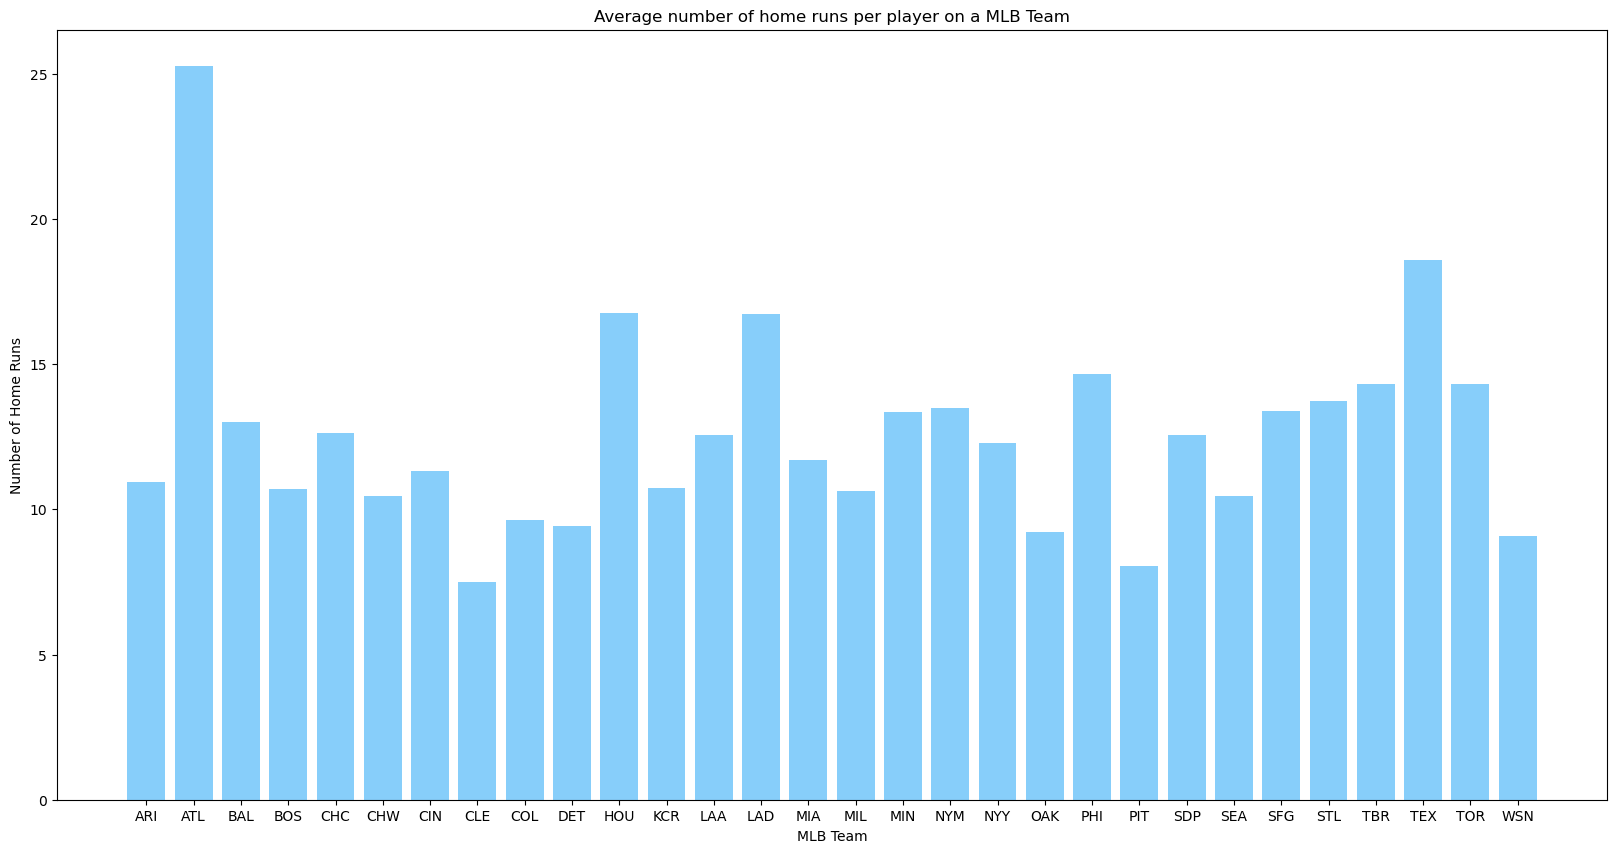

In [231]:
plt.figure(figsize=(20,10))
plt.bar(team_list, avg_hr, color = 'lightskyblue')
plt.xlabel('MLB Team')
plt.ylabel('Number of Home Runs')
plt.title('Average number of home runs per player on a MLB Team')
plt.show()

# Conclusion on Project
### This project I learned a lot of different tools for me to be a good data scientist.
* Tools I learned:
  * df.head()
  * df.tail()
  * df.isnull().sum()
  * df.duplicated()
  * plotting graphs
  * and many more
### I learned how to proplery import a data set and to be able to use the data functions and finding to represent them visually in a appealing and neat fashion. I look forward to building more projects and continue building my data science skills.